In [106]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
from sklearn import datasets, linear_model
from matplotlib import pyplot
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
data = pd.read_csv('downloads/houses_to_rent_v3.csv')
df = data

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [108]:
#df["city"] = df["city"].astype('category')
#df.dtypes
#df['city'].astype('category')
#df['city'] = df['city'].cat.codes

In [109]:
df_city = pd.get_dummies(df['city'])

In [110]:
combined = pd.concat([df, df_city], axis = 1).reindex(df.index)

In [111]:
combined

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0,0,0,0,1
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0,0,0,0,1
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,0,0,1,0,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,0,0,1,0,0
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,0,0,1,0,0
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,0,0,0,0,1
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,0,0,0,1,0
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,0,0,0,1,0


In [112]:
df.groupby(['city', 'furniture'])['total (R$)'].sum()

city            furniture    
Belo Horizonte  furnished         1066314
                not furnished     6878261
Campinas        furnished          422790
                not furnished     2284015
Porto Alegre    furnished         1218135
                not furnished     2348676
Rio de Janeiro  furnished         2439880
                not furnished     4482259
São Paulo       furnished        12019924
                not furnished    25544033
Name: total (R$), dtype: int64

In [85]:
y = combined['total (R$)']
feature = combined[['area','Belo Horizonte', 'Campinas', 'Porto Alegre']]
#, 'city', 'rooms', 'bathroom', 'floor', 'property tax (R$)', 'hoa (R$)'
#maybe cities need to be in ones and zeros
x = (feature)

#y = y.values.reshape(-1,1)

#x = x.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

train_test_split(y, shuffle=False)


[0       5618
 1       7973
 2       3841
 3       1421
 4        836
         ... 
 8014    4169
 8015     710
 8016     659
 8017    2143
 8018    6338
 Name: total (R$), Length: 8019, dtype: int64,
 8019      5476
 8020      3561
 8021      5905
 8022      3951
 8023      2616
          ...  
 10687     1926
 10688    19260
 10689     7390
 10690    14020
 10691     1587
 Name: total (R$), Length: 2673, dtype: int64]

In [86]:
x_train

,area,Belo Horizonte,Campinas,Porto Alegre
6239,200,0,0,0
9805,225,0,0,0
10314,53,0,1,0
10072,42,0,0,1
3026,101,0,0,0
...,...,...,...,...
5734,17,0,0,0
5191,104,0,0,0
5390,100,0,0,0
860,53,0,0,0


In [87]:
forest_model = RandomForestRegressor(max_leaf_nodes=9, random_state=7)
forest_model.fit(x_train, y_train.ravel())
y_pred = forest_model.predict(x_test)
val_mae = mean_absolute_error(y_pred, y_test)
print(mean_absolute_error(y_test, y_pred))
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))
forest_model.score(x_test, y_test)

2157.3130397117607
Validation MAE for best value of max_leaf_nodes: 2,157


0.49554906087295014

Text(0.5, 1.0, 'Residual plot')

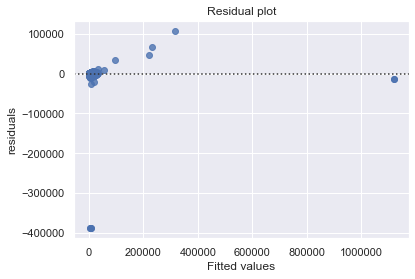

In [88]:
predictions = forest_model.predict(x_train)
y_trainresiduals = y_train#.reshape(-1)
residuals = y_trainresiduals - predictions
residuals
y_trainresiduals
sns.residplot(y_trainresiduals, residuals)
        

plt.ylabel('residuals')
plt.xlabel("Fitted values")
plt.title('Residual plot')


In [89]:
predictions = forest_model.predict(x_test)
y_trainresiduals = y_test.reshape(-1)
residuals = y_trainresiduals - predictions
residuals
y_trainresiduals
sns.residplot(y_trainresiduals, residuals)
        

plt.ylabel('residuals')
plt.xlabel("Fitted values")
plt.title('Residual plot')


AttributeError: 'Series' object has no attribute 'reshape'

In [90]:
residuals.min()

-390336.05378654896

In [91]:
feature_importances = pd.DataFrame(forest_model.feature_importances_,
                                   index = x_train.columns,
                                    columns = ['importance']).sort_values('importance',         ascending=False)

In [92]:
x_train

,area,Belo Horizonte,Campinas,Porto Alegre
6239,200,0,0,0
9805,225,0,0,0
10314,53,0,1,0
10072,42,0,0,1
3026,101,0,0,0
...,...,...,...,...
5734,17,0,0,0
5191,104,0,0,0
5390,100,0,0,0
860,53,0,0,0


Feature: 0, Score: 0.64629
Feature: 1, Score: 0.35224
Feature: 2, Score: 0.00097
Feature: 3, Score: 0.00050


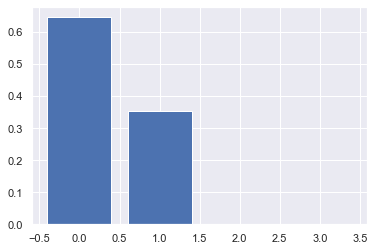

In [93]:
importance = forest_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [105]:
def spin_words(sentence):
    if len(sentence) == 0:
        return None
    words = sentence.split(" ")
    for wordindex,word in enumerate(words):
        if len(word)>=5:
            words[wordindex] = reverse(word)
    return " ".join(word for word in words)
          
    
def reverse(word):
    l = len(word)
    res = ""
    for index in range(1,l+1):
        res += word[-index]
#       print res
    return res

In [ ]:
#ask what happened with the reshape and also possibly try and figure out why the feature importanvce doesnt look right